# Logistic Regression
>fuente: bank marketing campagin data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle


## Descripción del problema
#### El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

## Recopilación de datos

In [2]:
df = pd.read_csv('/workspaces/adamcn10-intro-ml/data/raw/bank-marketing-campaign-data.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Análisis Descriptivo

>Forma de los datos e indormación de estos

In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Observaciones- Conclusiones
>- El DataFrame consta de 41188 entradas correspondientes a clientes del banco con 21 columnas cada una correspondientes a datos de estos.
>- Encontramos 10 datos númericos de los cuales 5 son decimales y 5 son enteros. Encontramos también 11 variables categoricas donde se encuentra nuestra variable objetivo y que corresponde a si el cliente contrata o no un deposito a largo plazo.
>- Ningun dato contiene elementos nulos por lo que podriamos decir que los datos están completos.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


>Observamos también cuantos valores únicos tienen cada una de las variables.

In [6]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

#### Observaciones - Conclusiones
>- Vemos muchos valores diferentes en 'duration' porque es la duración del contacto previo en segundos, y por lo tanto puede tener mucha variabilidad.
>- En tasa del euribor 3 meses también vemos variación pero no demasiada como para alarmarnos.
>- El tercer valor con más variación es la edad, pero con el desctibe anterior hemos visto que los valores estan comprendidos en un rango razonable entre 17 y 98 años.

## Limpieza de datos

### Eliminación de duplicados

In [7]:
df.duplicated().sum()

np.int64(12)

>Vemos que en el DataFrame encontramos 12 filas de datos duplicados por lo que los eliminaremos con drop_duplicates

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

>La nueva matriz sin duplicados consta de 41176 entradas en vez de las 41188 anteriores

### Eliminación de la información irrelevante

>A priori no veo ninguna información que sea ciertamente irrelevante, veremos más adelante cuales parecen no influir demasiado al no ver ninguna correlación.

## Análisis de Variables

### Análisis de Variables Univariante

#### Análisis de Variables Univariante Categóricas

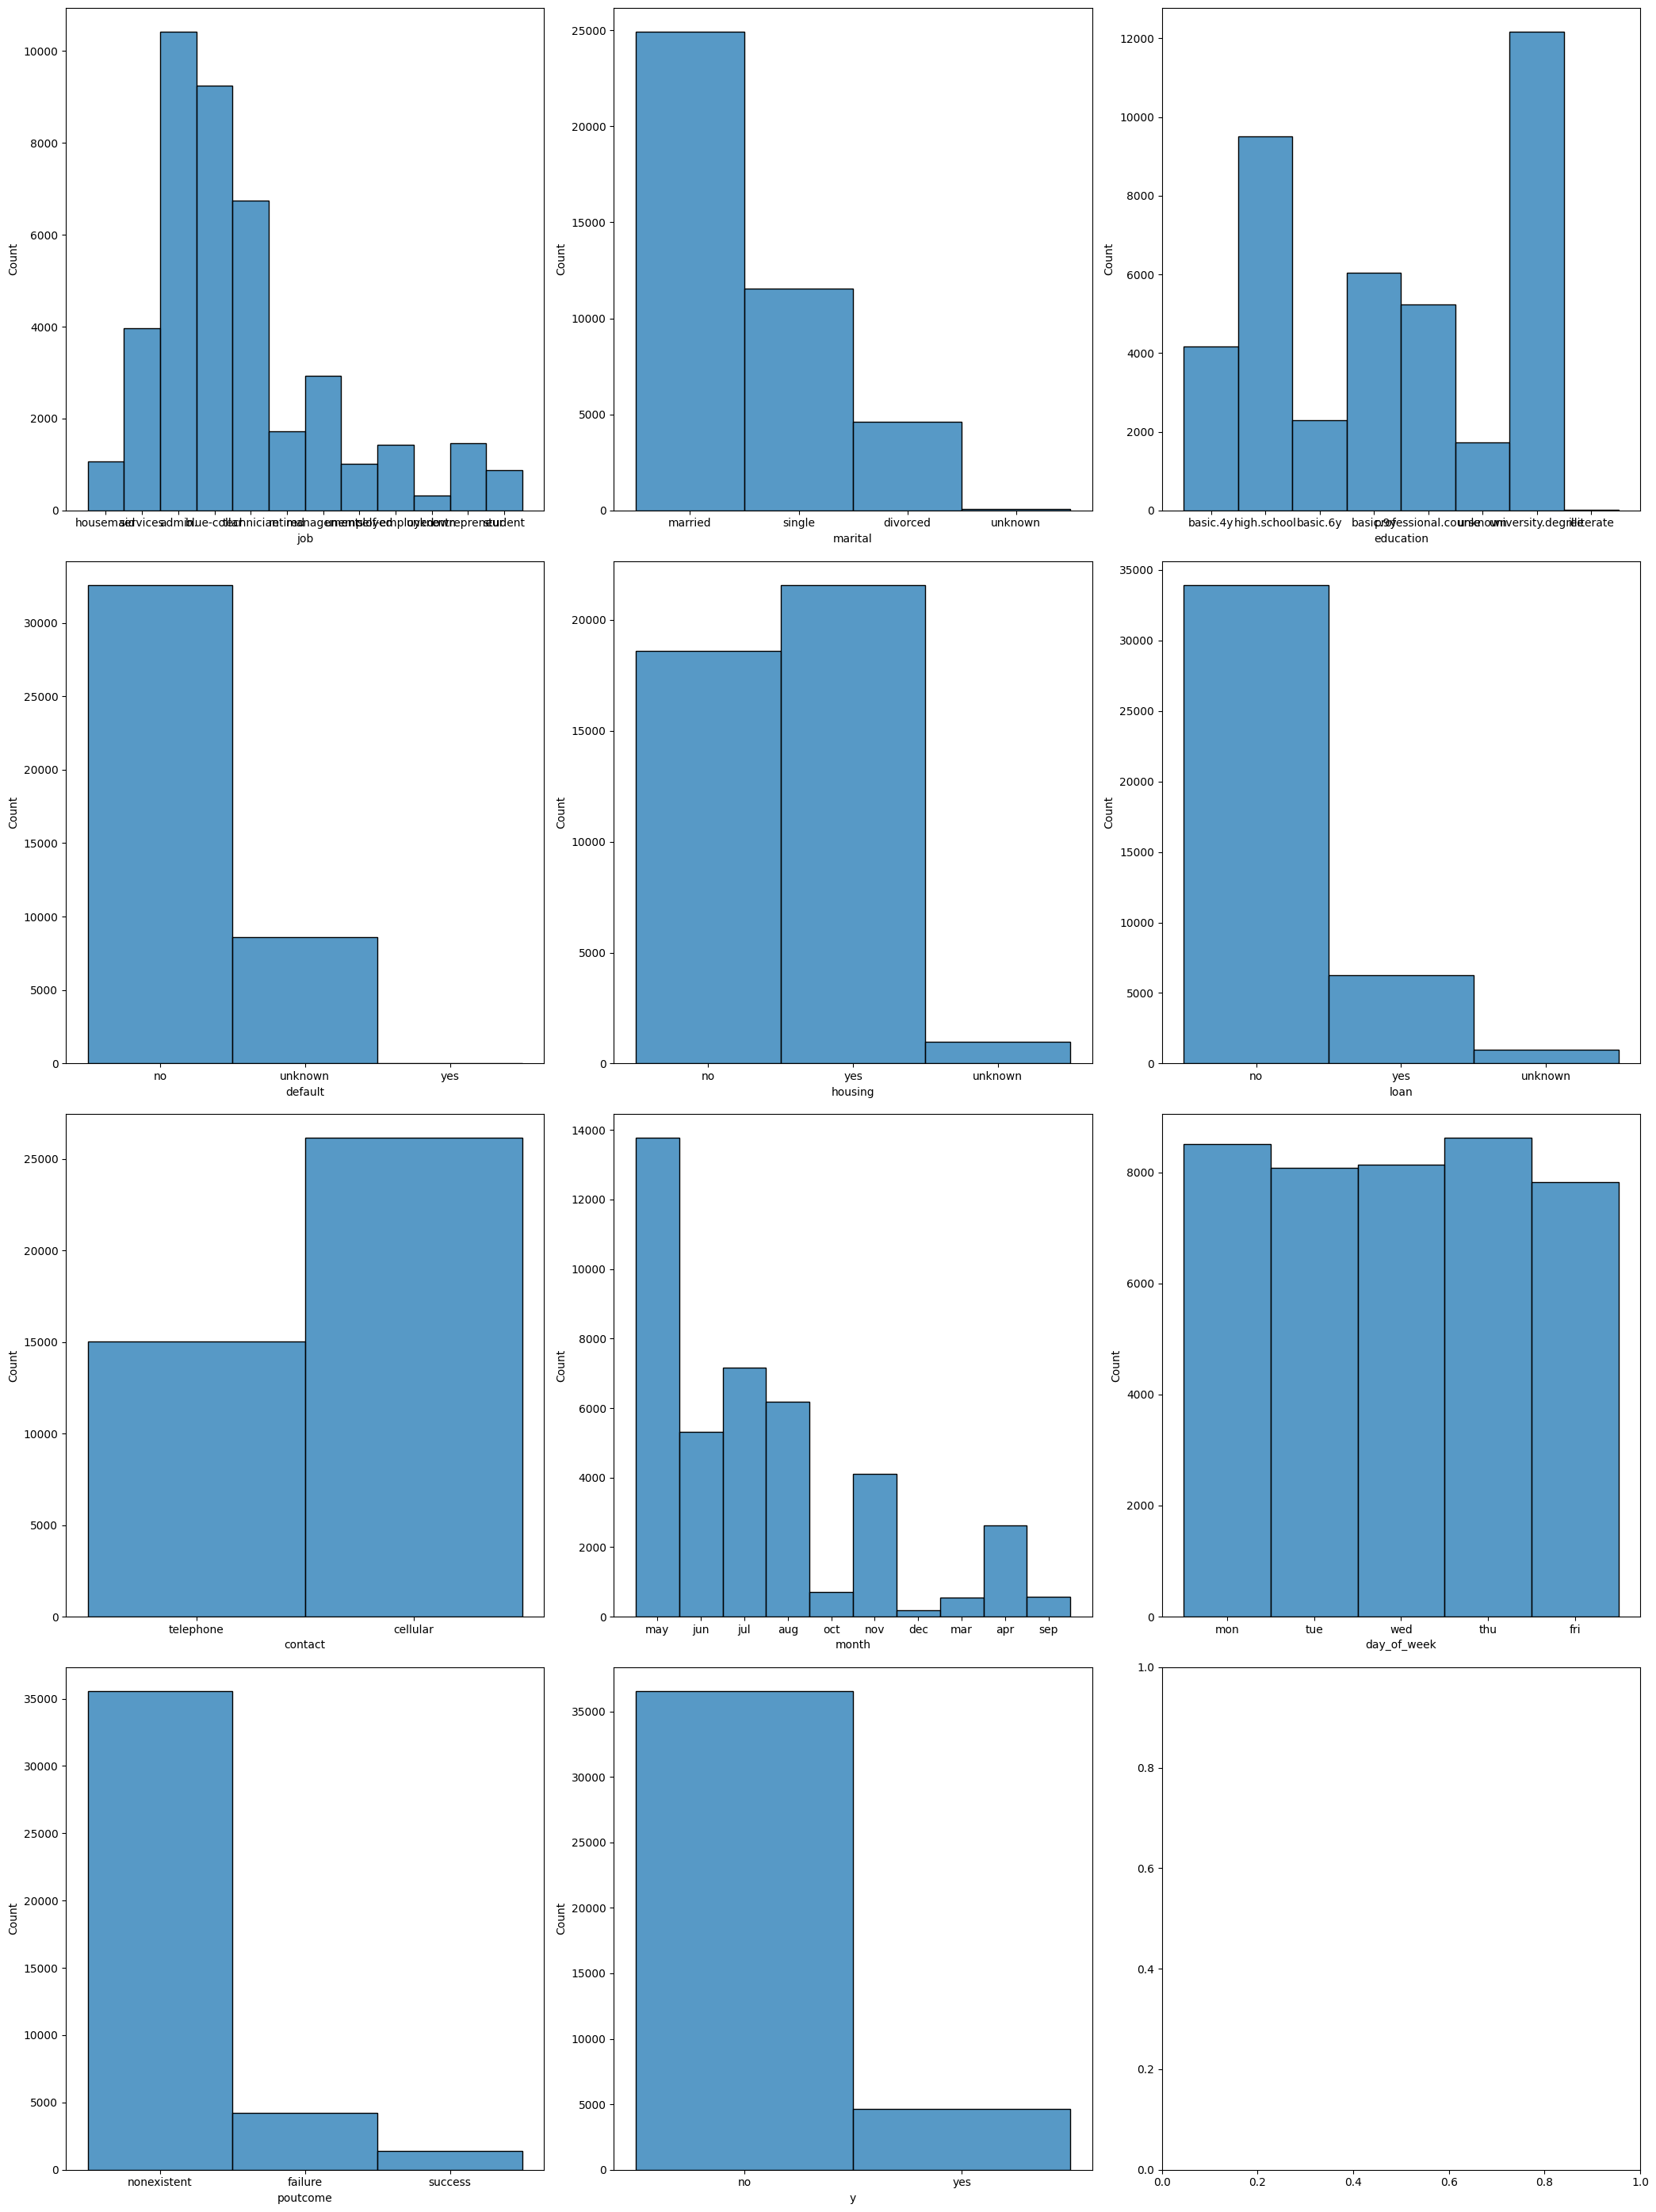

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(21,28))
sns.histplot(ax=axs[0, 0], data=df, x="job")
sns.histplot(ax=axs[0, 1], data=df, x="marital")
sns.histplot(ax=axs[0, 2], data=df, x="education")
sns.histplot(ax=axs[1, 0], data=df, x="default")
sns.histplot(ax=axs[1, 1], data=df, x="housing")
sns.histplot(ax=axs[1, 2], data=df, x="loan")
sns.histplot(ax=axs[2, 0], data=df, x="contact")
sns.histplot(ax=axs[2, 1], data=df, x="month")
sns.histplot(ax=axs[2, 2], data=df, x="day_of_week")
sns.histplot(ax=axs[3, 0], data=df, x="poutcome")
sns.histplot(ax=axs[3, 1], data=df, x="y")
plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>- Respecto al trabajo vemos 3 trabajos mayoritarios, 2 secundarios y el resto minoritarios.
>- Proporcionalmente vemos muchisimos más casados que solteros o divorciados, además vemos algo más del doble de solteros que de divorciados.
>- La mayroía de clientes tienen estudios universitarios, seguidos por los clientes que simplemente superaron el instituto.
>- En cuanto a si tienen crédito actualmente solo vemos valores de No y desconocidos.
>- Vemos más clientes con un prestamo para la vivienda muy seguidos de los que no tienen, pero también vemos unos pocos datos desconocidos.
>- En lo que hace referencia a prestamos personales, la gran mayoría de los clientes no tienen ningún prestamo personal, hay pocos clientes que sí y también tenemos algunos resultados desconocidos.
>- Respecto al medio de contacto la mayoría tienen por teléfono móvil pero seguido bastante de los teléfonos fijos.
>- Mayo fue el més con más últimos contactos, el resto están muy cercanos entre si quitando octubre, diciembre, marzo y setiembre con muy pocos últimos contactos.
>- En cuanto a los dias de la semana, la repartición está bastante equiparada de lunes a viernes.
>- La mayoría de clientes no fueron contactados en la campaña anterior de marqueting, pero de los pocos que sí, solo resultaron favorables cerca de un tercio respecto a los que fueron desfavorables.
>- Respecto a la variable objetivo, vemos cerca de siete veces más No que Sí.

#### Análisis de Variables Univariante Numéricas

<function matplotlib.pyplot.show(close=None, block=None)>

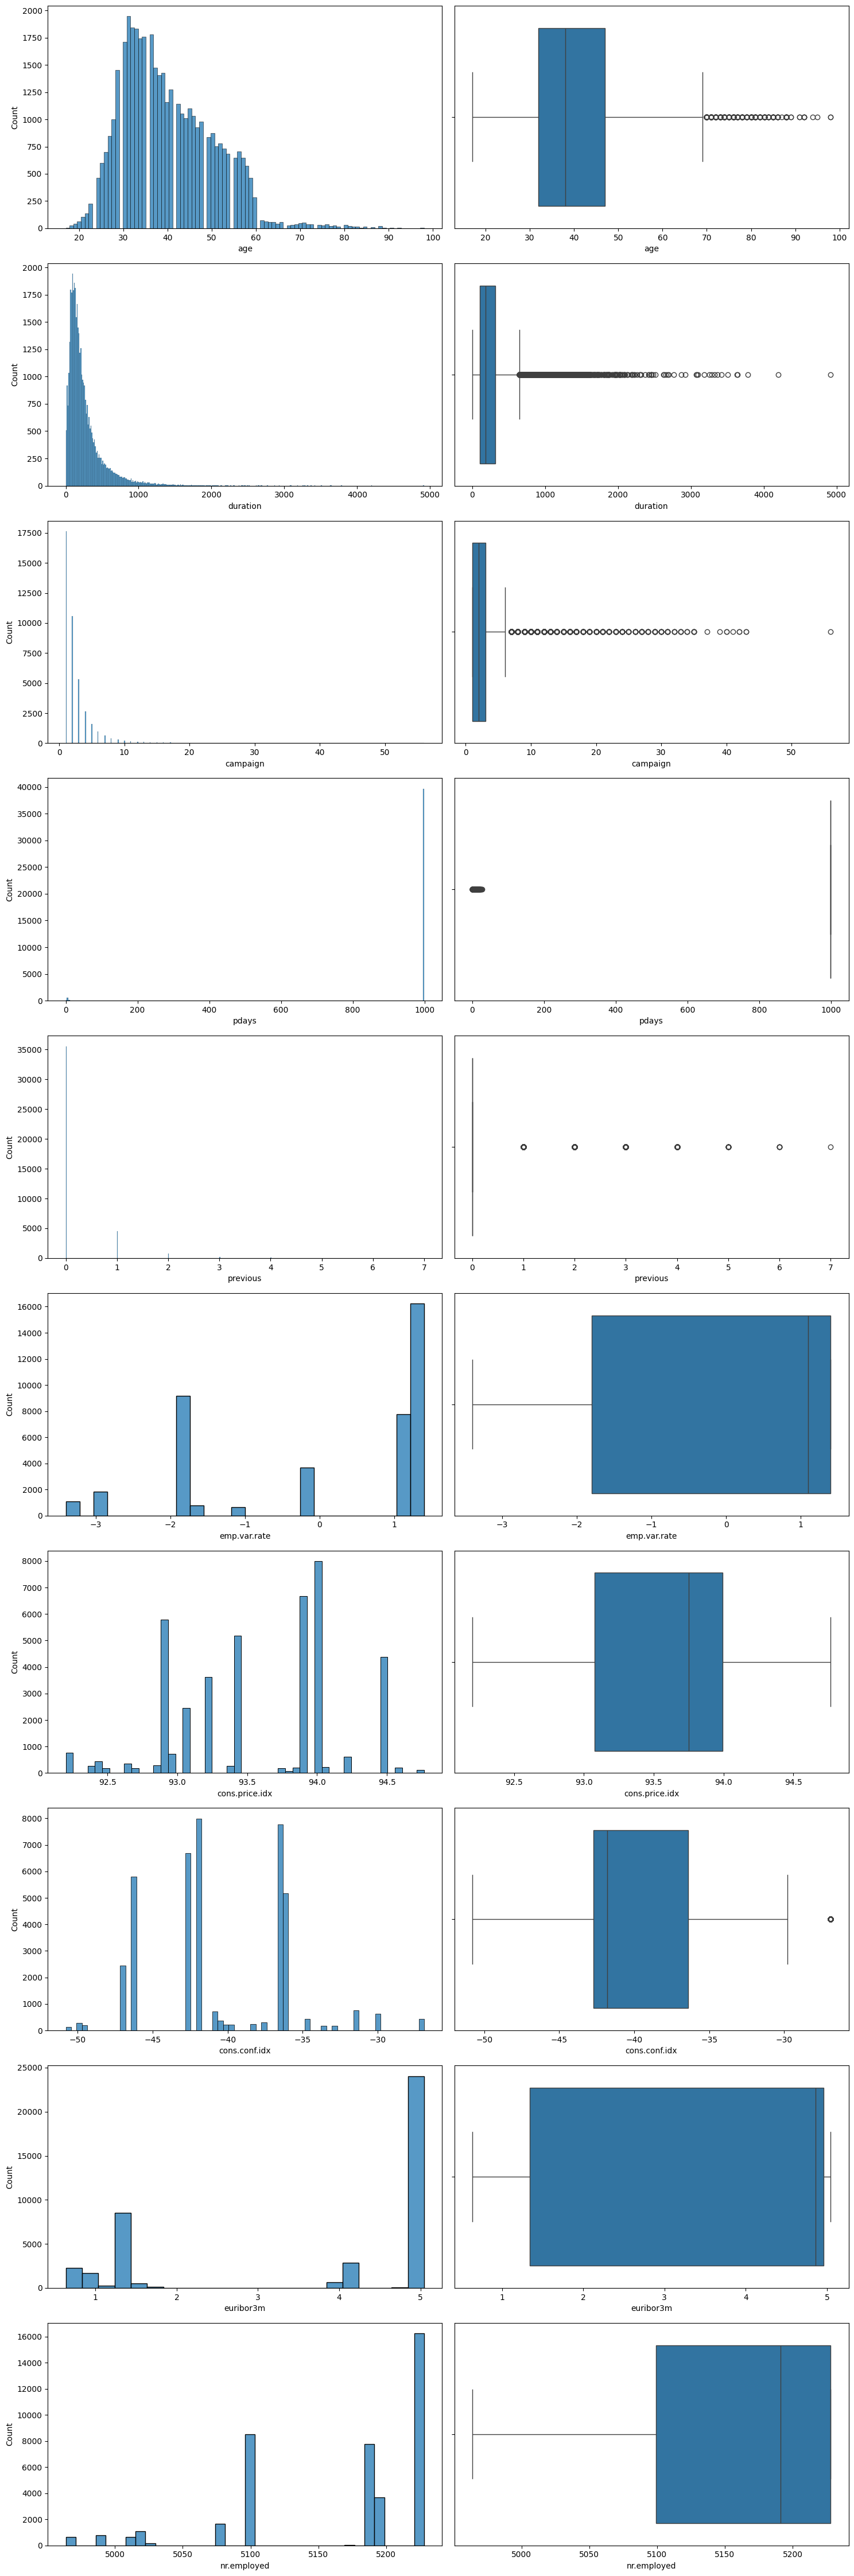

In [10]:
fig, axis = plt.subplots(10, 2, figsize=(15, 45))
sns.histplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[0, 1], data=df, x="age")
sns.histplot(ax=axis[1, 0], data=df, x="duration")
sns.boxplot(ax=axis[1, 1], data=df, x="duration")
sns.histplot(ax=axis[2, 0], data=df, x="campaign")
sns.boxplot(ax=axis[2, 1], data=df, x="campaign")
sns.histplot(ax=axis[3, 0], data=df, x="pdays")
sns.boxplot(ax=axis[3, 1], data=df, x="pdays")
sns.histplot(ax=axis[4, 0], data=df, x="previous")
sns.boxplot(ax=axis[4, 1], data=df, x="previous")
sns.histplot(ax=axis[5, 0], data=df, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=df, x="emp.var.rate")
sns.histplot(ax=axis[6, 0], data=df, x="cons.price.idx")
sns.boxplot(ax=axis[6, 1], data=df, x="cons.price.idx")
sns.histplot(ax=axis[7, 0], data=df, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=df, x="cons.conf.idx")
sns.histplot(ax=axis[8, 0], data=df, x="euribor3m")
sns.boxplot(ax=axis[8, 1], data=df, x="euribor3m")
sns.histplot(ax=axis[9, 0], data=df, x="nr.employed")
sns.boxplot(ax=axis[9, 1], data=df, x="nr.employed")

plt.tight_layout()
plt.show

##### Observaciones - Conclusiones
>- Edad: Vemos unos valores centralizados entre 30 y 40 años con una subida pronunciada desde los 17 y una bajada lenta hasta los 60 y una cola larga con pocos valores desde 60 hasta el final con pocos valores por número. También vemos outliers.
>- Duración: Vemos la mayoría de valores agrupados al principio, desde el principio con una larga cola por la derecha con muchos outliers muy alejados al final.
>- Contactos: La gran mayoría de clientes solo han sido contactados una vez y muchos menos clientes por cada contacto más. Con varios outliers cafa vez más alejados.
>- pdays: La mayoría de dias transcurridos desde la anterior campaña hasta el contacto son 999 y los pocos restantes se encuentran entre 0 y 30
>- previous: La mayoría de clientes en la campaña anterior son 0, luego encontramos outliers entre 1 y 7 con cantidades descendentes.
>- Tasa variación empleo: los valores se encuentran entre -4 y 2 con picos en torno a -2 y 1.
>- Índice de precios: Los valores se encuentran entre 92 y 95 con dos picos en torno a 94 y cuatro picos más en torno a 94.5, 93, 93.5 y en medio de estas dos últimas.
>- Índice de confianza: Los valores se encuentran mayoritariamente entre -30 y -50 con picos cercanos a -37, -42.5, y -47. con un valor outlier mayor de -30.
>- Tasa EURIBOR: Los valores se encuentran entre 0 y 5 con un gran pico en 5 y uno más pequeño entre 1 y 2.
>- Número de empleados: Los valores se encuentran entre 4950 y 5250 con un gran pico cercano a 5250 y dos más pequeños en torno a 5100 y 5200.

### Análisis de Variable Multivariable

>Para los analisis correlacionales utilizaré primero la función get_dummies() de pandas que convierte las variables categóricas en numéricas

In [11]:
df['y_n'] = pd.factorize(df['y'])[0]

#### Análisis numérico-numérico

>Generamos las correlaciones

In [12]:
corr_y_age = df[["y_n", "age"]].corr()
corr_y_duration = df[["y_n", "duration"]].corr()
corr_y_campaign = df[["y_n", "campaign"]].corr()
corr_y_pdays = df[["y_n", "pdays"]].corr()
corr_y_previous = df[["y_n", "previous"]].corr()
corr_y_emp_var_rate = df[["y_n", "emp.var.rate"]].corr()
corr_y_cons_price_idx = df[["y_n", "cons.price.idx"]].corr()
corr_y_cons_conf_idx = df[["y_n", "cons.conf.idx"]].corr()
corr_y_euribor3m = df[["y_n", "euribor3m"]].corr()
corr_y_nr_employed = df[["y_n", "nr.employed"]].corr()

>Generamos los graficos

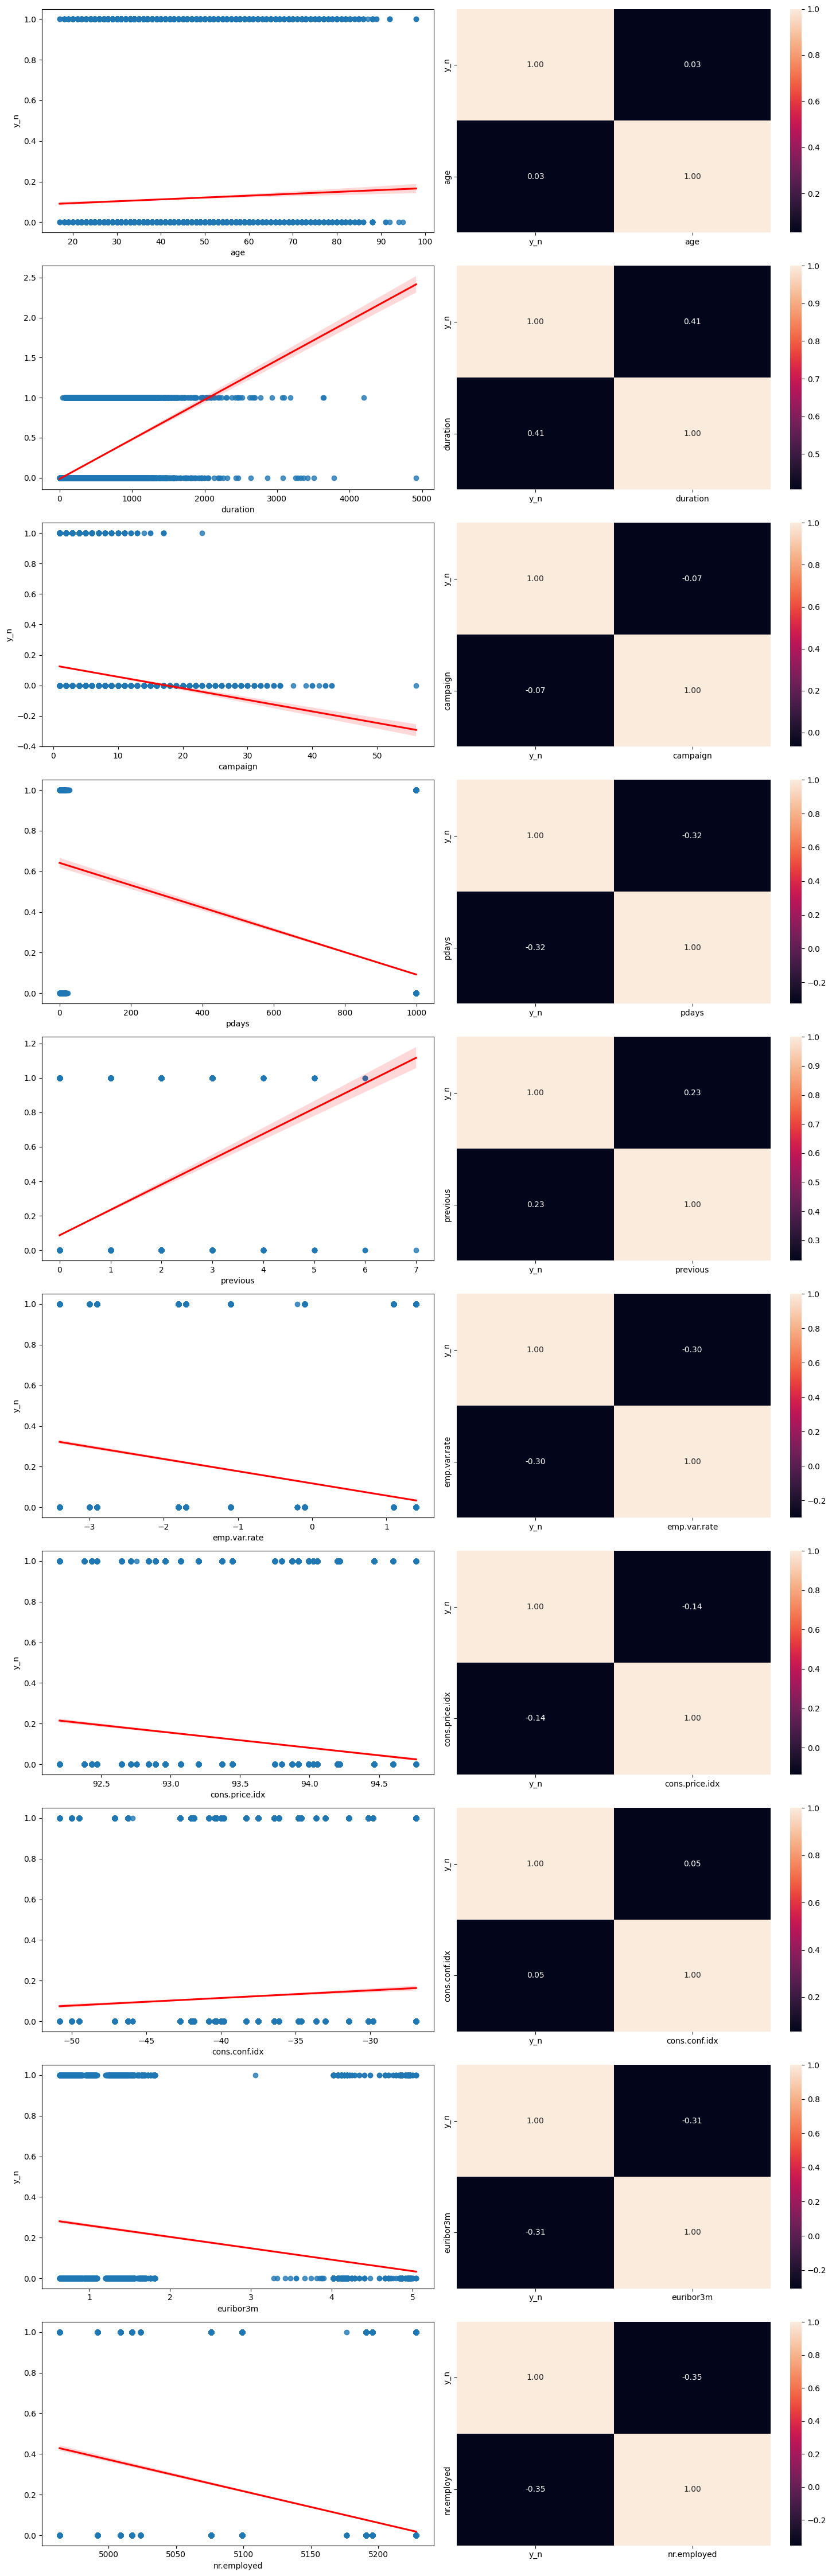

In [13]:
fig, axis = plt.subplots(10, 2, figsize=(15, 45))

sns.regplot(ax=axis[0, 0], data=df, x="age", y="y_n", line_kws={'color': 'red'})
sns.heatmap(ax=axis[0, 1], data=corr_y_age, annot=True, fmt=".2f")
sns.regplot(ax=axis[1, 0], data=df, x="duration", y="y_n", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_y_duration, annot=True, fmt=".2f")
sns.regplot(ax=axis[2, 0], data=df, x="campaign", y="y_n", line_kws={'color': 'red'})
sns.heatmap(ax=axis[2, 1], data=corr_y_campaign, annot=True, fmt=".2f")
sns.regplot(ax=axis[3, 0], data=df, x="pdays", y="y_n", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[3, 1], data=corr_y_pdays, annot=True, fmt=".2f")
sns.regplot(ax=axis[4, 0], data=df, x="previous", y="y_n", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[4, 1], data=corr_y_previous, annot=True, fmt=".2f")
sns.regplot(ax=axis[5, 0], data=df, x="emp.var.rate", y="y_n", line_kws={'color': 'red'})
sns.heatmap(ax=axis[5, 1], data=corr_y_emp_var_rate, annot=True, fmt=".2f")
sns.regplot(ax=axis[6, 0], data=df, x="cons.price.idx", y="y_n", line_kws={'color': 'red'})
sns.heatmap(ax=axis[6, 1], data=corr_y_cons_price_idx, annot=True, fmt=".2f")
sns.regplot(ax=axis[7, 0], data=df, x="cons.conf.idx", y="y_n", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[7, 1], data=corr_y_cons_conf_idx, annot=True, fmt=".2f")
sns.regplot(ax=axis[8, 0], data=df, x="euribor3m", y="y_n", line_kws={'color': 'red'})
sns.heatmap(ax=axis[8, 1], data=corr_y_euribor3m, annot=True, fmt=".2f")
sns.regplot(ax=axis[9, 0], data=df, x="nr.employed", y="y_n", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[9, 1], data=corr_y_nr_employed, annot=True, fmt=".2f")


plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>- Vemos un alto valor de correlación en varias caracteristicas, vemos una posible correlación lineal positiva con la duración de los contactos y la variable objetivo siendo esta también la correlación más alta. También vemos varios valores altos de correlaciones inversas, es decir negativas, estás son con las variables pdays, emp.var.rate, euribor3m y nr.employed.
>- También vemos una posible correlación leve con previous y la variable objetivo.
>- No parece que haya ningún tipo de correlación entre la variable objetivo y age, campaign, cons.price.idx y cons.conf.idx.

#### Análisis categórico-categórico

>Generamos los graficos directamente

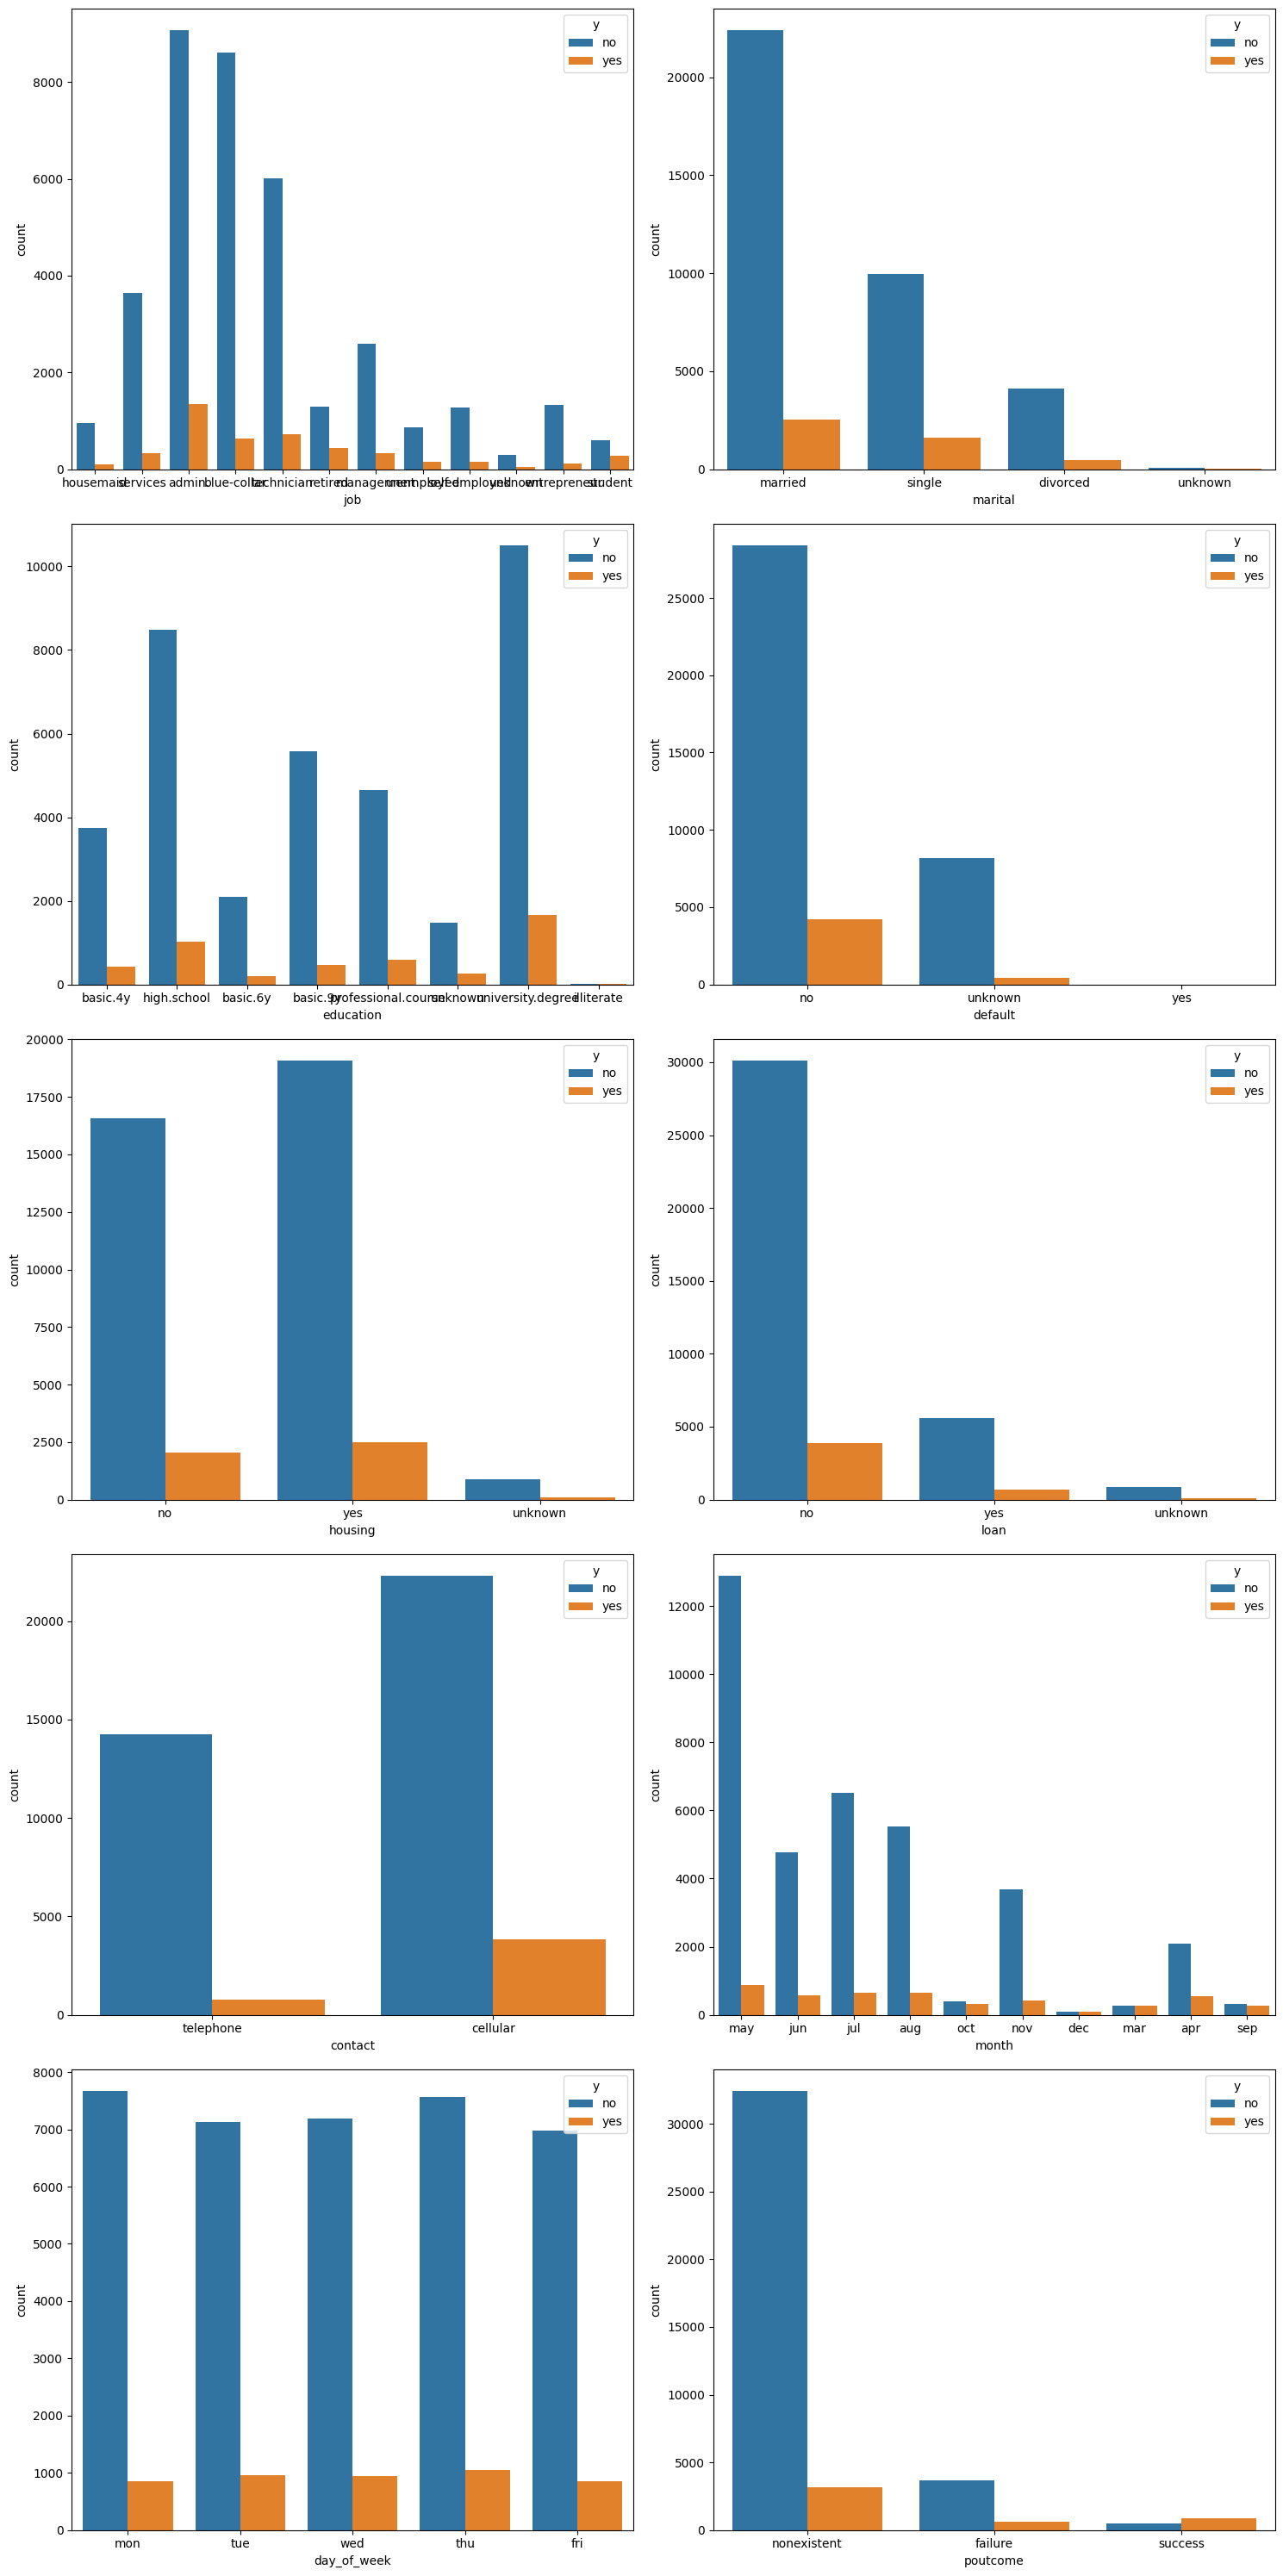

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(15, 30))
sns.countplot(ax=axs[0, 0], data=df, x="job", hue='y')
sns.countplot(ax=axs[0, 1], data=df, x="marital", hue='y')
sns.countplot(ax=axs[1, 0], data=df, x="education", hue='y')
sns.countplot(ax=axs[1, 1], data=df, x="default", hue='y')
sns.countplot(ax=axs[2, 0], data=df, x="housing", hue='y')
sns.countplot(ax=axs[2, 1], data=df, x="loan", hue='y')
sns.countplot(ax=axs[3, 0], data=df, x="contact", hue='y')
sns.countplot(ax=axs[3, 1], data=df, x="month", hue='y')
sns.countplot(ax=axs[4, 0], data=df, x="day_of_week", hue='y')
sns.countplot(ax=axs[4, 1], data=df, x="poutcome", hue='y')
plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>- job: Parece que proporcionalmente, los estudiantes son de los trabajos que más han contratado más depositos a largo plazo, aún así no es el grupo con más miembros en cuanto a valor absoluto, estos son admin i tachnician seguidos por retired y blue-collar.
>- marital: Pese a haber más depositos contratados entre casados, proporcionalmente hay muchos más en solteros seguidos por divorciados y algun desconocido.
>- education: Pese a haber más depositos contratados en valores absolutos entre graduados de universidad y de highschool, parece que todos los niveles de estudios siguen proporciones similares.
>- default: Vemos más en no que en desconocidos, tanto en valores absolutos como en proporcionales, pero en este último parece una diferencia leve.
>- housing: Vemos un valor más alto en lo absoluto entre la gente que si que tiene una hipoteca que en el resto, aunque las proporciones parecen muy similares.
>- loan: Vemos más depositos contratados entre la gente sin prestamos personales pero parece por el grafico que la gente que si que tiene los prestamos proporcionalmente tiene un valor más alto.
>- contact: La gente contactada por telefono mobil en vez de fijo tiene muchos valores más en absoluto y mucho más proporcionalmente en cuanto a depositos contratados.
>- month: Pese a ver una diferencia muy grande de ultimos contactos, vemos unos valores absolutos muy similares entre ellos todos los meses, lo que hace que proporcionalmente octubre, diciembre, marzo y setiembre son los que mayor valor porcentual de contratos de depositos.
>- day_of_week: Vemos unas cantidades de depositos tanto proporcionales como absolutos muy similares entre todos los dias.
>- poutcome: En cuanto a los resultados favorables de la anterior campaña vemos un mayor valor de contrataciones de depositos que de rechazos de estos pese que en valores absolutos hemos tenido más de los que no fueron consultados en la anterior.

> No parece que los valores de day_of_week, housing, default, education influyan mucho en el resultado del estudio porque sus valores proporcionales son muy similares entre todos sus valores.

### Análisis de Correlaciones

>Creamos columnas númericas para las variables categóricas temporales para estudiar las correlaciones entre todas.

In [15]:
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]

>Generamos el grafico de las correlaciones

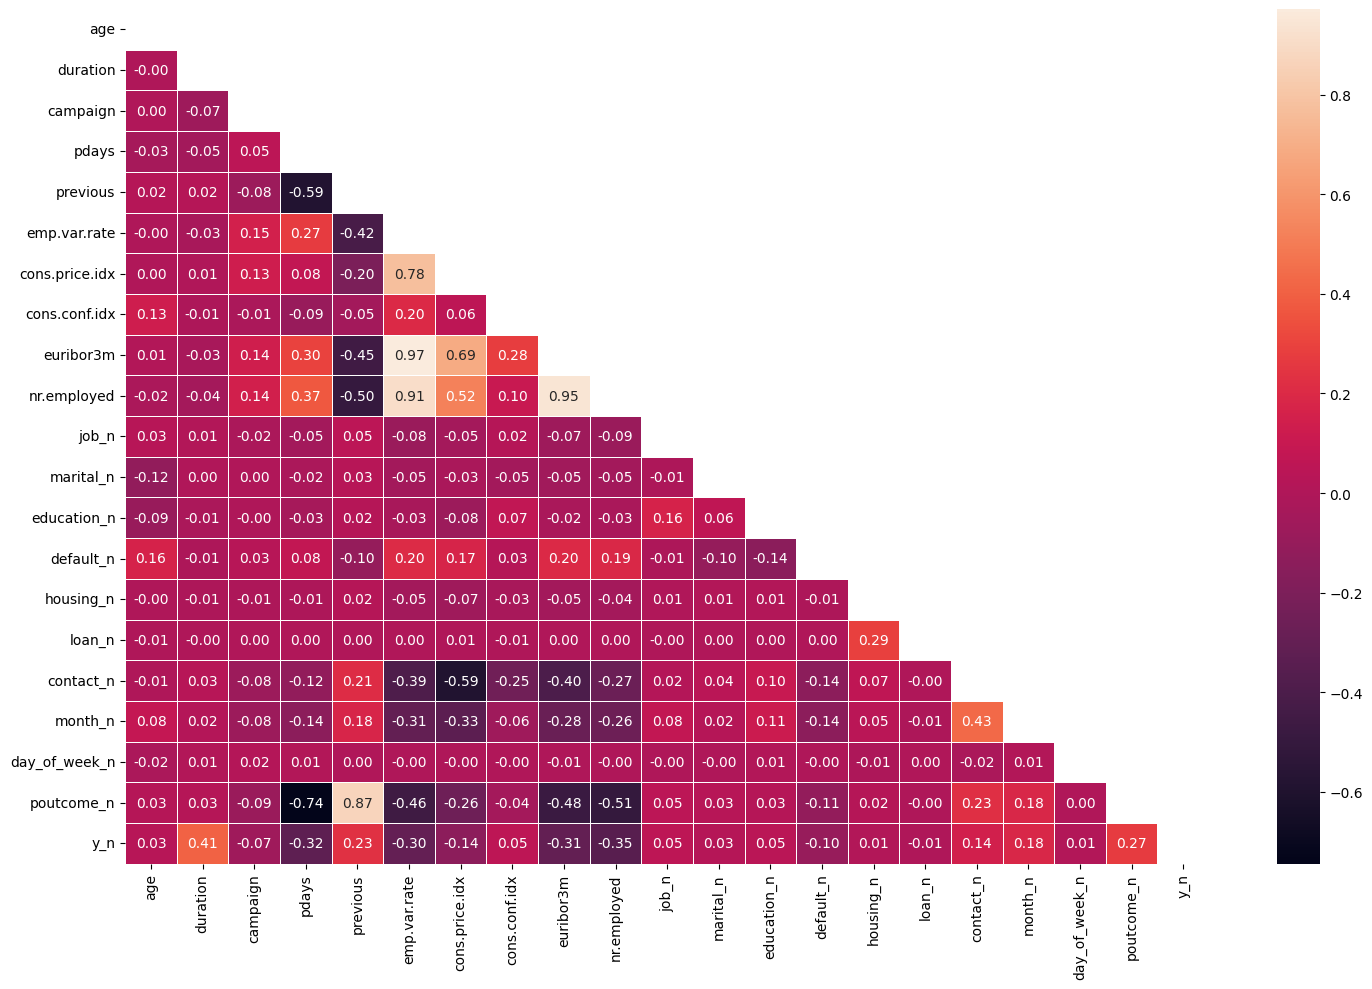

In [16]:
corr = df[['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_n',
       'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>La mayor correlación con la variable objetivo parece ser con la duración de la llamada de contacto ['duration'], seguida por pdays, emp.var.rate, euribor3m, nr.employed, poutcome_n y previous.

In [17]:
#sns.pairplot(data=df)

## Ingeniería de Caracteristicas

### Outliers

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


##### Observaciones - Conclusiones
> Para ver los Outliers posibles de los datos compararemos las medianas (percentil 50) con las medias y también veremos cuanto se alejan máximos y minimos de percentiles 75 y 25 respectivamente.
>- Vemos posibles Outliers por la derecha en datos como 'age', 'duration', 'campaign', 'previous', 'y_n', 'job_n', 'marital_n', 'default_n', 'loan_n', 'month_n' y 'poutcome_n'.
>- Vemos posibles Outliers por la izquierda en datos como 'pdays'.
>- No veo a simple vista Outliers en datos como 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'education_n', 'housing_n', 'contact_n' y 'day_of_week_n'.

<function matplotlib.pyplot.show(close=None, block=None)>

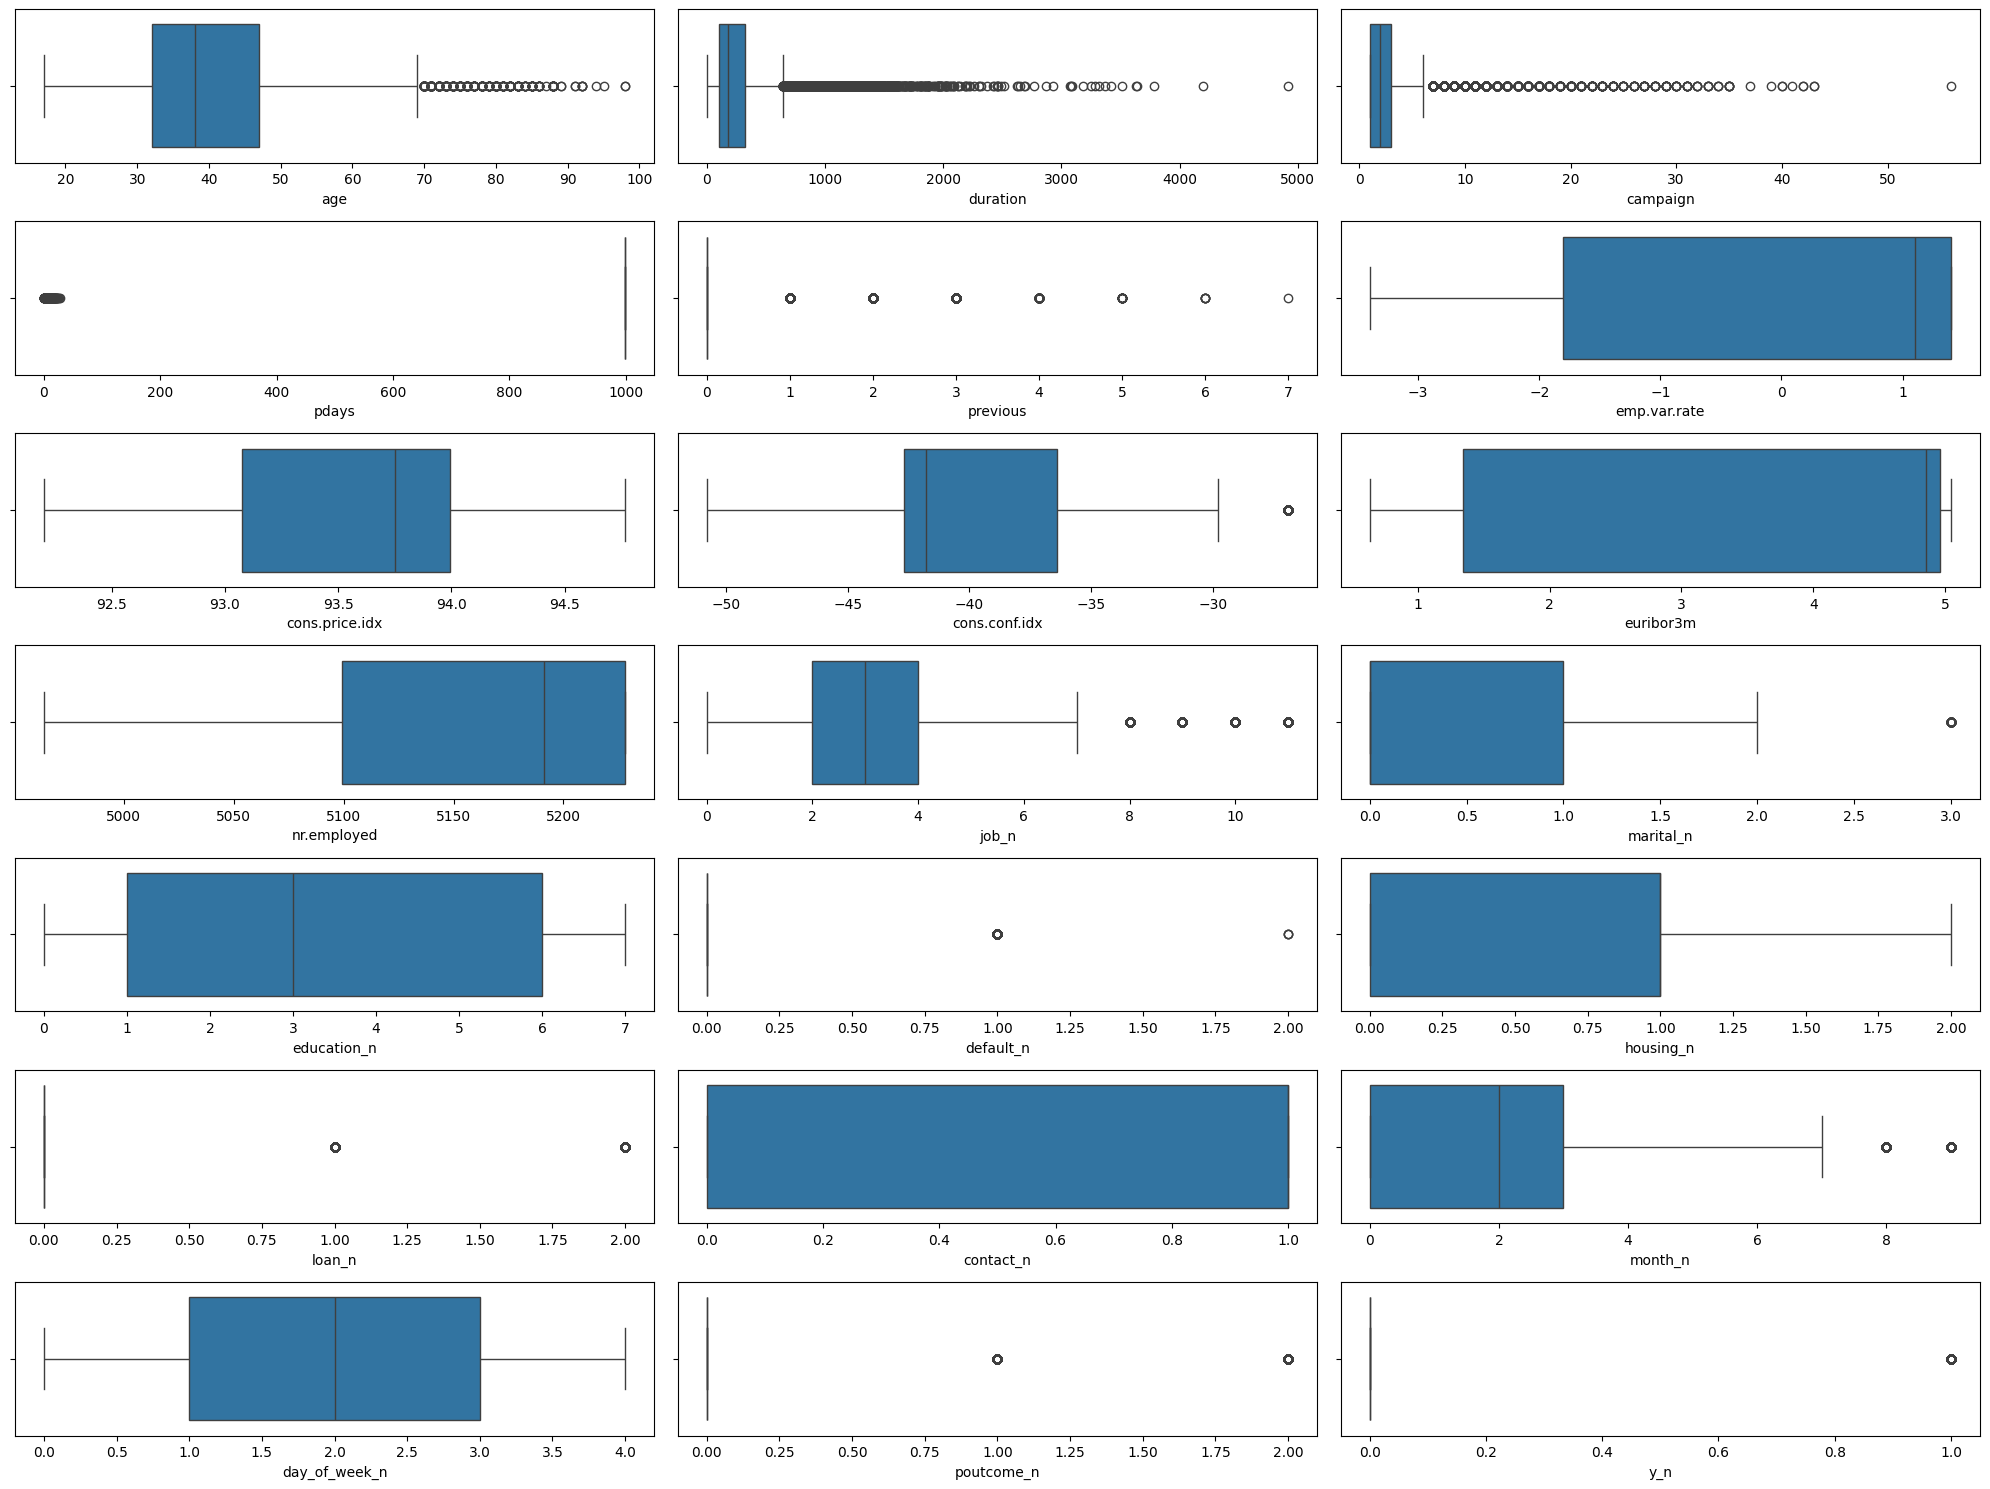

In [19]:
fig, axis = plt.subplots(7, 3, figsize=(20, 15))


sns.boxplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[0, 1], data=df, x="duration")
sns.boxplot(ax=axis[0, 2], data=df, x="campaign")
sns.boxplot(ax=axis[1, 0], data=df, x="pdays")
sns.boxplot(ax=axis[1, 1], data=df, x="previous")
sns.boxplot(ax=axis[1, 2], data=df, x="emp.var.rate")
sns.boxplot(ax=axis[2, 0], data=df, x="cons.price.idx")
sns.boxplot(ax=axis[2, 1], data=df, x="cons.conf.idx")
sns.boxplot(ax=axis[2, 2], data=df, x="euribor3m")
sns.boxplot(ax=axis[3, 0], data=df, x="nr.employed")
sns.boxplot(ax=axis[3, 1], data=df, x="job_n")
sns.boxplot(ax=axis[3, 2], data=df, x="marital_n")
sns.boxplot(ax=axis[4, 0], data=df, x="education_n")
sns.boxplot(ax=axis[4, 1], data=df, x="default_n")
sns.boxplot(ax=axis[4, 2], data=df, x="housing_n")
sns.boxplot(ax=axis[5, 0], data=df, x="loan_n")
sns.boxplot(ax=axis[5, 1], data=df, x="contact_n")
sns.boxplot(ax=axis[5, 2], data=df, x="month_n")
sns.boxplot(ax=axis[6, 0], data=df, x="day_of_week_n")
sns.boxplot(ax=axis[6, 1], data=df, x="poutcome_n")
sns.boxplot(ax=axis[6, 2], data=df, x="y_n")

plt.tight_layout()
plt.show

##### Observaciones - Conclusiones
> Gracias a los Boxplot podemos ver los outliers graficamente y saber a ciencia cierta que datos tienen y que datos no. 
>Podemos ver que 13 de las variables tienen outliers, pero 7 de estos solo tienen uno o dos elementos outliers, estas son la vatiable objetivo numerada 'y_n', 'poutcome_n', 'month_n', 'loan_n', 'default_n', 'marital_n' y 'cons.conf.idx', los otros 6 datos con más outliers son 'job_n', 'previous', 'pdays', 'campaign', 'duration' y 'age'. El resto de variables no contienen ningun tipo de outlier.


### Faltantes

In [20]:
df.isnull().sum() / df.shape[0]

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
y_n               0.0
job_n             0.0
marital_n         0.0
education_n       0.0
default_n         0.0
housing_n         0.0
loan_n            0.0
contact_n         0.0
month_n           0.0
day_of_week_n     0.0
poutcome_n        0.0
dtype: float64

In [21]:
df.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_n               0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
poutcome_n        0
dtype: int64

##### Observaciones - Conclusiones
>Podemos observar con las dos funciones que acabamos de usar que no hay ningun valor faltante que haya que solucionar o rellenar de ninguna manera.

### Inferencia de nuevas características

>No veo a simple vista inferencias que se puedan hacer relacionando los datos que tenemos en este proyecto, quizá por falta de conocimiento de los mismos datos o las relaciones entre estos.

## Split

>Antes de hacer el split voy a volver a limpiar el DataFrame para dejarlo con los datos importantes y sin los datos de apoyo o supletorios que he usado hasta ahora.

In [22]:
df.drop(['y_n', 'job_n',
       'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n'], inplace=True, axis=1)

>Ahora si que hacemos el split definitivo con una semilla de 25.

In [23]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=25)

## Scaling & Encoding

### Encoding

>Utilizaré tanto onehot encoding como label encoding ya que me da igual el orden de estas caracteristicas, solo aplicaré label encoding a 'job', 'education' y 'month' por tener demasiados resultados distintos como para hacer onehot encoding, para el resto de variables categoricas si que utilizaré este modo para que el modelo tenga la mayor fiabilidad.

In [24]:
onehot_encoder = OneHotEncoder(sparse_output=False)
label_encoders = {}

onehot_categories = ['marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'poutcome']
label_categories = ['job', 'education', 'month']

X_train_final = X_train.copy()
X_test_final = X_test.copy()

onehot_encoder.fit(X_train[onehot_categories])

X_train_ohe = onehot_encoder.transform(X_train[onehot_categories])
X_train_ohe_df = pd.DataFrame(X_train_ohe,
                              index=X_train.index,
                              columns=onehot_encoder.get_feature_names_out(onehot_categories))

X_test_ohe = onehot_encoder.transform(X_test[onehot_categories])
X_test_ohe_df = pd.DataFrame(X_test_ohe,
                             index=X_test.index,
                             columns=onehot_encoder.get_feature_names_out(onehot_categories))

for column in label_categories:
    label_encoder = LabelEncoder()
    X_train_final[f'{column}_n'] = label_encoder.fit_transform(X_train[column])
    X_test_final[f'{column}_n'] = label_encoder.fit_transform(X_test[column])
    label_encoders[f'label_encoder_{column}'] = label_encoder 

X_train_final = pd.concat([X_train_final, X_train_ohe_df], axis=1)
X_test_final = pd.concat([X_test_final, X_test_ohe_df], axis=1)


X_train_final.drop(['marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'day_of_week', 'poutcome', 'job', 'education', 
                    'month', 'marital_unknown', 'education_unknown', 'default_unknown',
                    'housing_unknown', 'loan_unknown', 'contact_telephone', 'day_of_week_fri',
                    'poutcome_nonexistent'], axis=1, inplace=True)
X_test_final.drop(['marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'day_of_week', 'poutcome', 'job', 'education', 
                    'month', 'marital_unknown', 'education_unknown', 'default_unknown',
                    'housing_unknown', 'loan_unknown', 'contact_telephone', 'day_of_week_fri',
                    'poutcome_nonexistent'], axis=1, inplace=True)

X_train_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_yes,loan_no,loan_yes,contact_cellular,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
14591,32,881,1,999,0,1.4,93.918,-42.7,4.961,5228.1,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
29643,39,405,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
36978,51,135,2,999,1,-2.9,92.469,-33.6,1.072,5076.2,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3678,40,33,1,999,0,1.1,93.994,-36.4,4.859,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30599,53,206,3,999,0,-1.8,92.893,-46.2,1.354,5099.1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Scaling

>Como teniamos bastantes columnas con muchos outliers y no se han eliminado utilizaré RobustScaling, este es el tipo de escalado que mejor trata los outliers.

In [25]:
robust_scaler = RobustScaler()

robust_scaler_train = robust_scaler.fit_transform(X_train_final)
robust_scaler_test = robust_scaler.transform(X_test_final)

X_train_final = pd.DataFrame(robust_scaler_train, 
                             columns=X_train_final.columns,
                             index=X_train_final.index)

X_test_final = pd.DataFrame(robust_scaler_test, 
                            columns=X_test_final.columns,
                            index=X_test_final.index)


X_train_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_yes,loan_no,loan_yes,contact_cellular,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
14591,-0.400000,3.230415,-0.5,0.0,0.0,0.09375,0.183896,-0.142857,0.028753,0.287597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29643,0.066667,1.036866,0.0,0.0,0.0,-0.90625,-0.733406,-0.841270,-0.954382,-0.712403,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36978,0.866667,-0.207373,0.0,0.0,1.0,-1.25000,-1.392818,1.301587,-1.046447,-0.889922,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3678,0.133333,-0.677419,-0.5,0.0,0.0,0.00000,0.266594,0.857143,0.000553,0.000000,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
30599,1.000000,0.119816,0.5,0.0,0.0,-0.90625,-0.931447,-0.698413,-0.968482,-0.712403,...,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Guardado de Encodings y Scalings

In [26]:
with open('/workspaces/adamcn10-intro-ml/models/logistic-regression-onehot-encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

for column in label_categories:
    with open(f'/workspaces/adamcn10-intro-ml/models/logistic-regression-label-encoder-{column}.pkl', 'wb') as file:
        pickle.dump(label_encoders[f'label_encoder_{column}'], file)

with open('/workspaces/adamcn10-intro-ml/models/logistic-regression-robust-scaler.pkl', 'wb') as file:
    pickle.dump(robust_scaler, file)        

>Guardamos el onehot encoder, los 3 label encoder utilizados y el robust scaler.

## Selección de caracteristicas

>Haremos primero una prueba con los parametros por defecto y con semilla 25, posteriormente veremos cuales son las mejores opciones para tener el mejor modelo posible.

>Generamos la instancia del modelo de LogisticRegression y lo entrenamos con fit con la partición para entrenar tanto de la información como el resultado.

In [27]:
model = LogisticRegression(random_state=25)

model.fit(X_train_final, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,25
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(X_test_final)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'],
      shape=(8236,), dtype=object)

In [29]:
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.9119718309859155

>Parece que el modelo básico predice con más de un 91% de acierto, vamos a ver también la matriz de confusión

<function matplotlib.pyplot.show(close=None, block=None)>

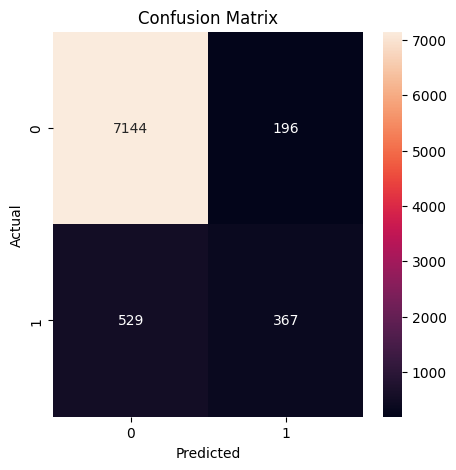

In [30]:
confusion = confusion_matrix(y_test, y_pred)
df_confusion = pd.DataFrame(confusion)

plt.figure(figsize=(5,5))
sns.heatmap(df_confusion, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

>Ahora utilizaremos GridSearchCV para ver con que hyperparametros quedarnos para obtener el mejor modelo posible

In [35]:
hyperparams = {'penalty': ['l1', 'l2', 'elasticnet'],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = GridSearchCV(model,
                    hyperparams,
                    scoring="accuracy",
                    cv=5)
grid

,estimator,LogisticRegre...ndom_state=25)
,param_grid,"{'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [38]:
grid.fit(X_train_final, y_train)

grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.

{'penalty': 'l2', 'solver': 'lbfgs'}

In [39]:
grid.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,25
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


>Vemos que en el modelo de regresión logistica, en vez de las caracteristicas por defecto, los mejores hyperparametros son 'C': 0.001, 'penalty': None, 'solver': 'lbfgs'

In [40]:
best_model_grid = grid.best_estimator_

y_pred_grid = best_model_grid.predict(X_train_final)

grid_accuracy = accuracy_score(y_train, y_pred_grid)

model_accuracy, grid_accuracy

(0.9119718309859155, 0.9106253794778385)

>Se suponía que las mejores caracteristicas para el modelo eran las anteriormente mencionadas, pero al comparar los valores de accuracy vemos que el modelo original hecho tiene una mejor precisión en las diezmilesimas, la diferencia es de en torno a 0.0003.

## Modelado final

>El modelo final que utilizaremos será el de la primera prueba, el llamado model

In [41]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,25
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Guardar el modelo

In [42]:
with open('/workspaces/adamcn10-intro-ml/models/logistic-regression-final-model.pkl', 'wb') as file:
    pickle.dump(model, file)     